# Библиотеки

In [7]:
import numpy as np
import pandas as pd
from functools import cache
from typing import Literal
import matplotlib.pyplot as plt
import mne

import keras_cv
import keras
from keras import ops
import tensorflow as tf

# Импорт данных

In [4]:
path = '/kaggle/input/hms-harmful-brain-activity-classification'

def load_eeg(eeg_id, data_type:Literal['train','test']='train'):
    eeg_df = pd.read_parquet(f'{path}/{data_type}_eegs/{eeg_id}.parquet')
    return eeg_df

In [5]:
train_df = pd.read_csv(f'{path}/train.csv')
train_df.head()

eeg_id  eeg_sub_id  eeg_label_offset_seconds  spectrogram_id  \
0  1628180742           0                       0.0          353733   
1  1628180742           1                       6.0          353733   
2  1628180742           2                       8.0          353733   
3  1628180742           3                      18.0          353733   
4  1628180742           4                      24.0          353733   

   spectrogram_sub_id  spectrogram_label_offset_seconds    label_id  \
0                   0                               0.0   127492639   
1                   1                               6.0  3887563113   
2                   2                               8.0  1142670488   
3                   3                              18.0  2718991173   
4                   4                              24.0  3080632009   

   patient_id expert_consensus  seizure_vote  lpd_vote  gpd_vote  lrda_vote  \
0       42516          Seizure             3         0         0          0   
1       42516          Seizure             3         0         0          0   
2       42516          Seizure             3         0         0          0   
3       42516          Seizure             3         0         0          0   
4       42516          Seizure             3         0         0          0   

   grda_vote  other_vote  
0          0           0  
1          0           0  
2          0           0  
3          0           0  
4          0           0

In [6]:
eeg_df = load_eeg(train_df.iloc[0,0])
eeg_df


Fp1          F3          C3          P3          F7          T3  \
0      -80.519997  -70.540001  -80.110001 -108.750000 -120.330002  -88.620003   
1      -80.449997  -70.330002  -81.760002 -107.669998 -120.769997  -90.820000   
2      -80.209999  -75.870003  -82.050003 -106.010002 -117.500000  -87.489998   
3      -84.709999  -75.339996  -87.480003 -108.970001 -121.410004  -94.750000   
4      -90.570000  -80.790001  -93.000000 -113.870003 -129.960007 -102.860001   
...           ...         ...         ...         ...         ...         ...   
17995 -144.660004 -147.809998 -129.820007 -129.460007 -157.509995 -124.000000   
17996 -140.880005 -153.000000 -129.529999 -129.020004 -154.059998 -131.220001   
17997 -133.729996 -141.770004 -121.900002 -122.370003 -158.750000 -123.550003   
17998 -141.449997 -151.139999 -127.190002 -128.699997 -163.460007 -124.309998   
17999 -138.669998 -147.210007 -122.820000 -128.289993 -164.869995 -124.239998   

               T5          O1          Fz          Cz         Pz         Fp2  \
0     -101.750000 -104.489998  -99.129997  -90.389999 -97.040001  -77.989998   
1     -104.260002  -99.730003  -99.070000  -92.290001 -96.019997  -84.500000   
2      -99.589996  -96.820000 -119.680000  -99.360001 -91.110001  -99.440002   
3     -105.370003 -100.279999 -113.839996 -102.059998 -95.040001  -99.230003   
4     -118.599998 -101.099998 -107.660004 -102.339996 -98.510002  -95.300003   
...           ...         ...         ...         ...        ...         ...   
17995 -124.570000  -94.820000 -153.070007 -121.110001 -86.459999 -132.520004   
17996 -128.380005  -95.000000 -140.820007 -114.639999 -84.379997 -115.339996   
17997 -127.730003  -93.089996 -125.230003 -106.489998 -83.419998 -112.720001   
17998 -129.479996  -94.419998 -140.869995 -113.339996 -83.519997 -129.300003   
17999 -129.339996  -95.320000 -136.789993 -112.820000 -84.660004 -129.380005   

               F4          C4          P4          F8         T4          T6  \
0      -88.830002 -112.120003 -108.110001  -95.949997 -98.360001 -121.730003   
1      -84.989998 -115.610001 -103.860001  -97.470001 -89.290001 -115.500000   
2     -104.589996 -127.529999 -113.349998  -95.870003 -96.019997 -123.879997   
3     -101.220001 -125.769997 -111.889999  -97.459999 -97.180000 -128.940002   
4      -88.930000 -115.639999  -99.800003  -97.500000 -88.730003 -114.849998   
...           ...         ...         ...         ...        ...         ...   
17995 -138.339996 -128.970001  -71.300003 -114.480003 -86.709999 -114.959999   
17996 -119.230003 -114.709999  -70.989998  -92.129997 -79.639999 -116.139999   
17997 -103.209999 -107.629997  -61.869999  -97.910004 -77.150002 -106.500000   
17998 -118.650002 -117.589996  -71.879997  -99.279999 -83.900002 -116.160004   
17999 -123.180000 -122.889999  -79.910004 -101.459999 -84.339996 -125.989998   

               O2        EKG  
0     -106.449997   7.920000  
1     -102.059998  29.219999  
2     -105.790001  45.740002  
3     -109.889999  83.870003  
4     -100.250000  97.769997  
...           ...        ...  
17995  -81.500000 -20.070000  
17996  -81.879997  10.600000  
17997  -75.339996  -2.060000  
17998  -81.410004   2.820000  
17999  -89.110001  35.279999  

[18000 rows x 20 columns]

In [10]:
info = mne.create_info(
    eeg_df.columns.to_list(),
    ch_types=(["eeg"]*(len(eeg_df.columns)-1))+['ecg'],
    sfreq=200
)

info.set_montage("standard_1020")

raw.plot_sensors(show_names=True)
plt.tight_layout()

# график для простмотра и отчистки данных
raw.plot(show_scrollbars=False, show_scalebars=False, duration= duration, scalings=scalings)
plt.tight_layout()

<Info | 8 non-empty values
 bads: []
 ch_names: Fp1, F3, C3, P3, F7, T3, T5, O1, Fz, Cz, Pz, Fp2, F4, C4, P4, ...
 chs: 19 EEG, 1 ECG
 custom_ref_applied: False
 dig: 22 items (3 Cardinal, 19 EEG)
 highpass: 0.0 Hz
 lowpass: 100.0 Hz
 meas_date: unspecified
 nchan: 20
 projs: []
 sfreq: 200.0 Hz
>

In [43]:
data_values = eeg_df.values.T
raw = mne.io.RawArray(data_values*1e-6, info)

Creating RawArray with float64 data, n_channels=20, n_times=18000
    Range : 0 ... 17999 =      0.000 ...    89.995 secs
Ready.


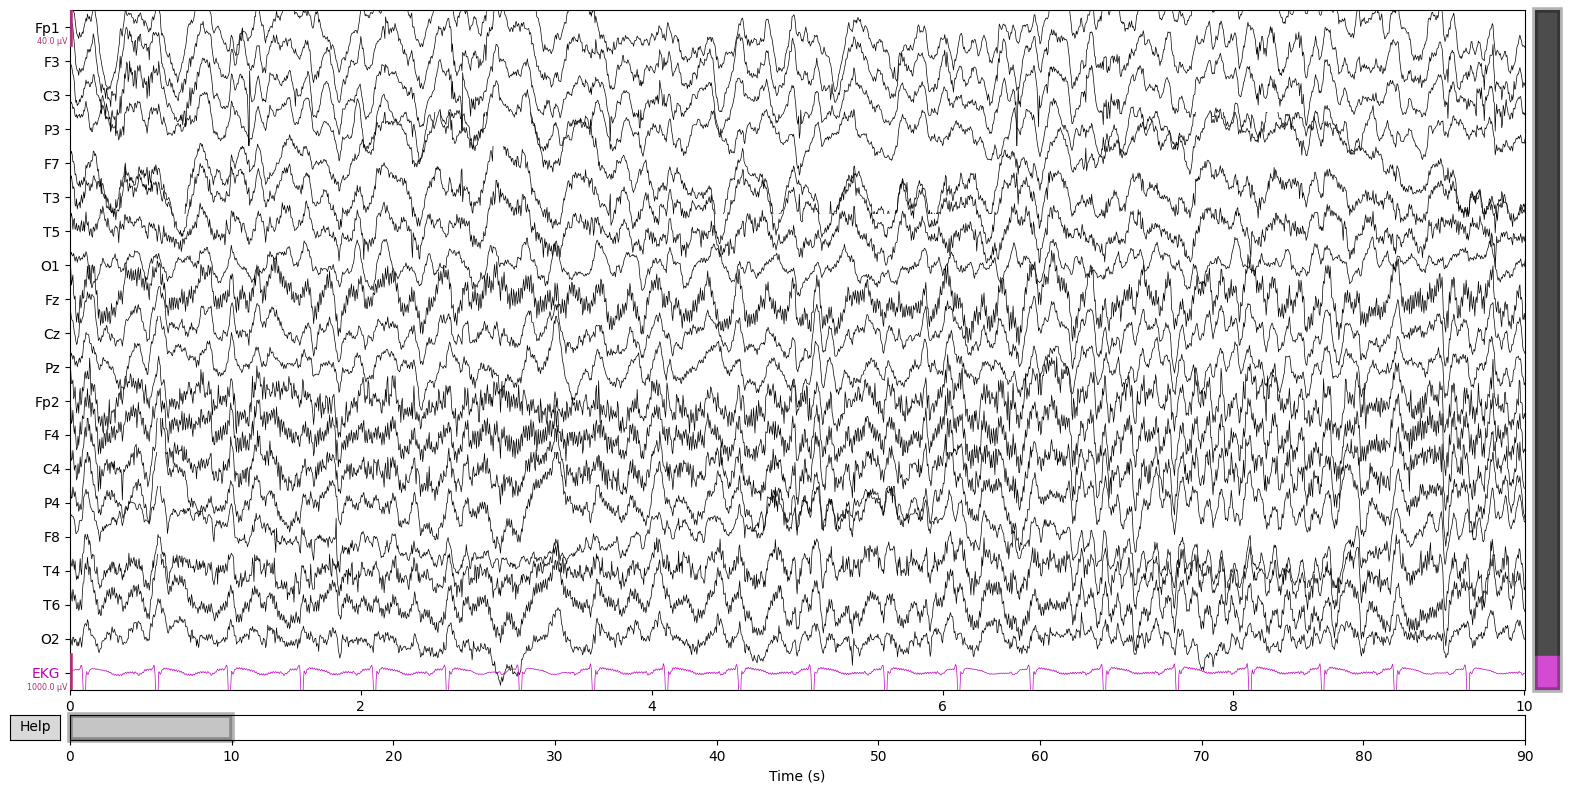

In [44]:
mne.set_config('MNE_BROWSE_RAW_SIZE','16,8')
raw.plot() #start=, duration=  если поскролить хотим то вписываем это
plt.show()

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 1321 samples (6.605 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband ed

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


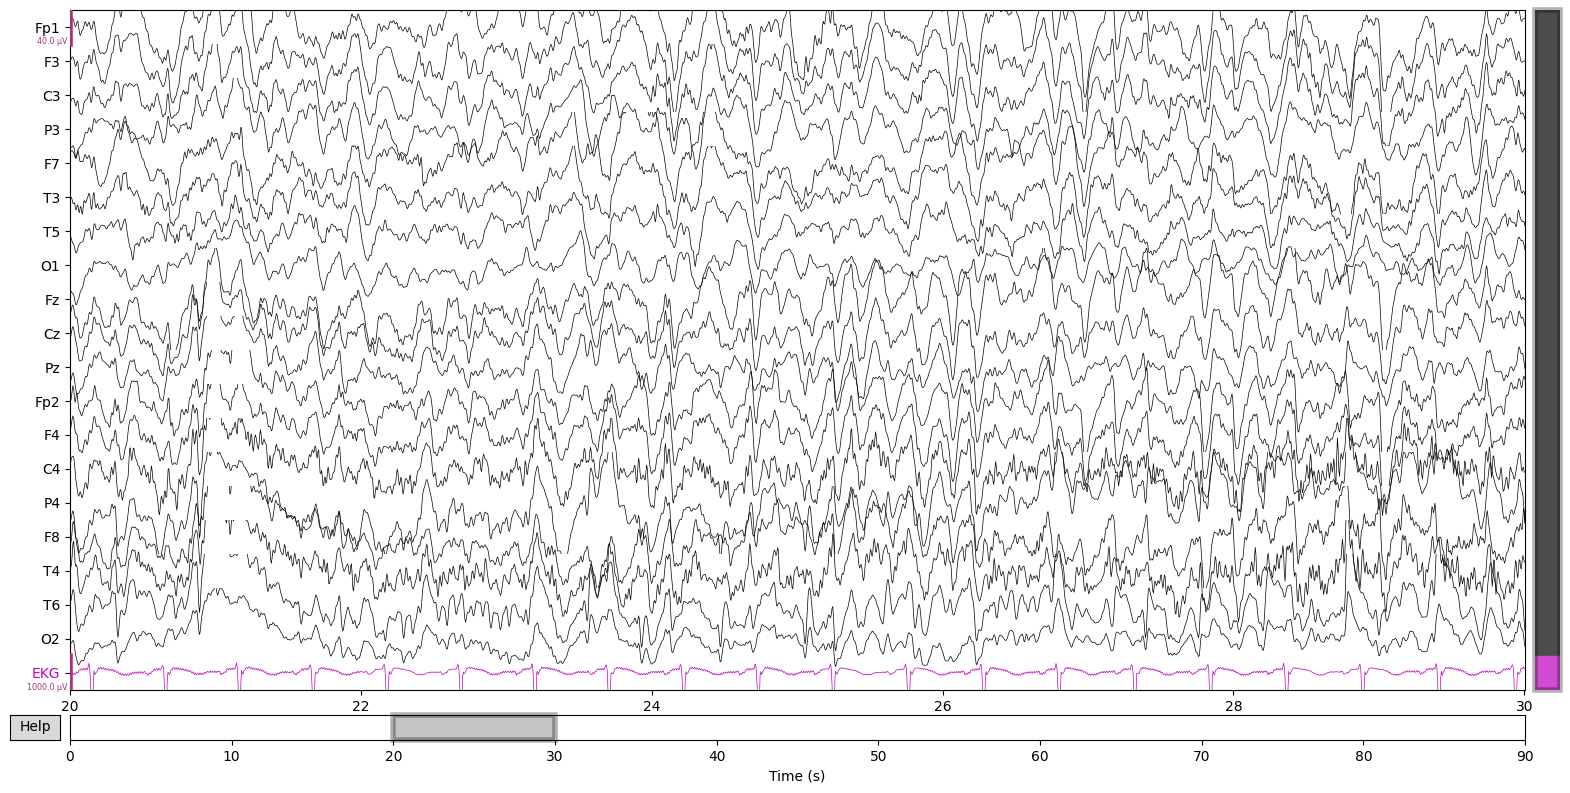

In [15]:
raw_filtered = raw.notch_filter(50).filter(0.1, 45)
raw_filtered.plot(start=20, duration=10)
plt.show()

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 70 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 70.00 Hz
- Upper transition bandwidth: 17.50 Hz (-6 dB cutoff frequency: 78.75 Hz)
- Filter length: 661 samples (3.305 s)

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 59 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 59.35
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 59.10 Hz)
- Upper passband edge

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


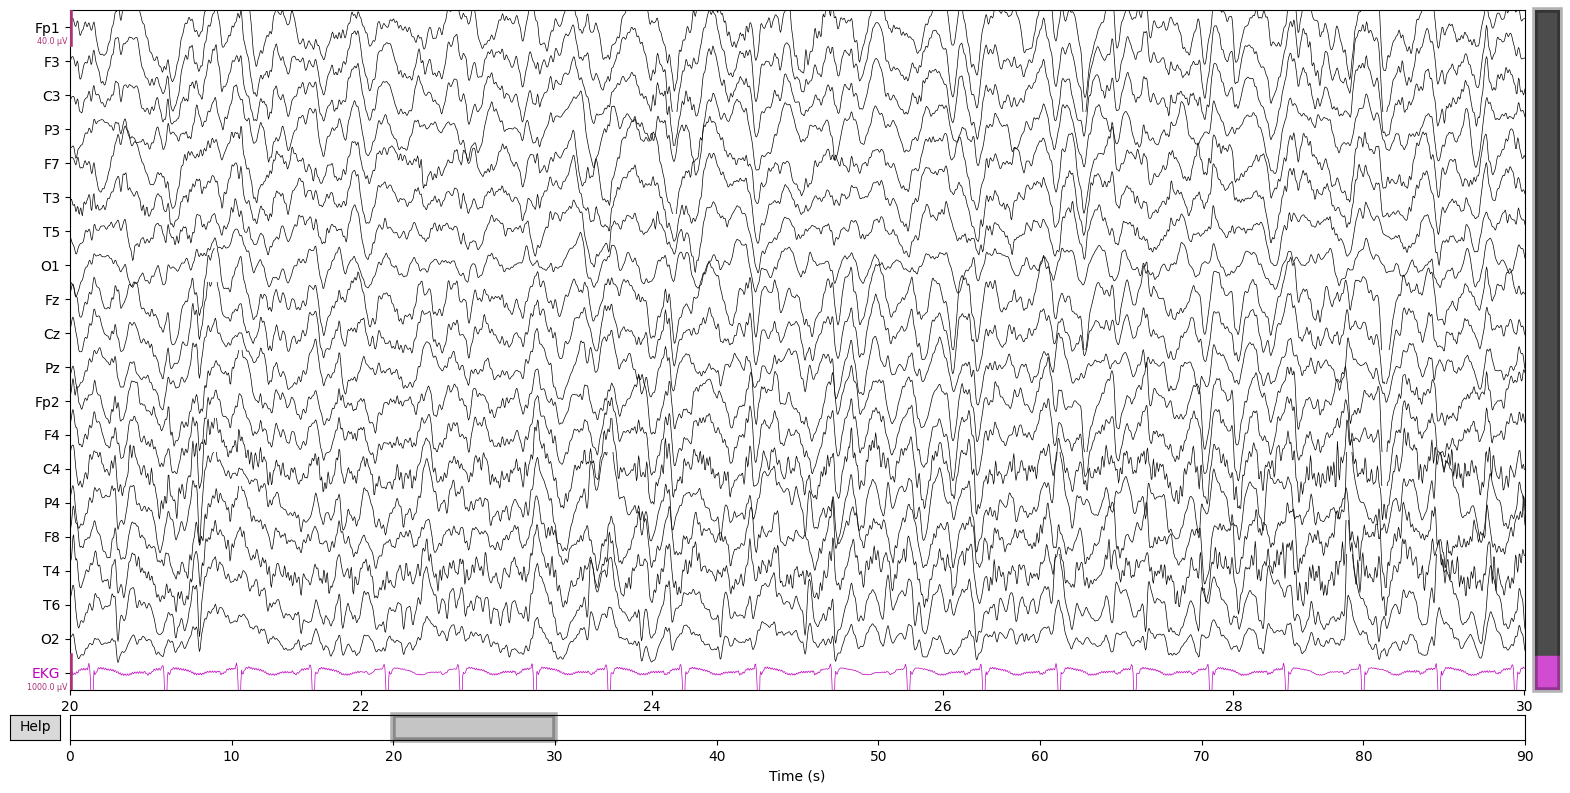

In [16]:
raw_filtered = raw.copy().filter(l_freq=1, h_freq=70,).notch_filter(60, picks='eeg')
raw_filtered.plot(start=20, duration=10)
plt.show()

In [21]:
ica = mne.preprocessing.ICA(n_components=0.95)
ica.fit(raw)

Fitting ICA to data using 19 channels (please be patient, this may take a while)
Selecting by explained variance: 9 components
Fitting ICA took 0.5s.


<ICA | raw data decomposition, method: fastica (fit in 26 iterations on 18000 samples), 9 ICA components (19 PCA components available), channel types: eeg, no sources marked for exclusion>

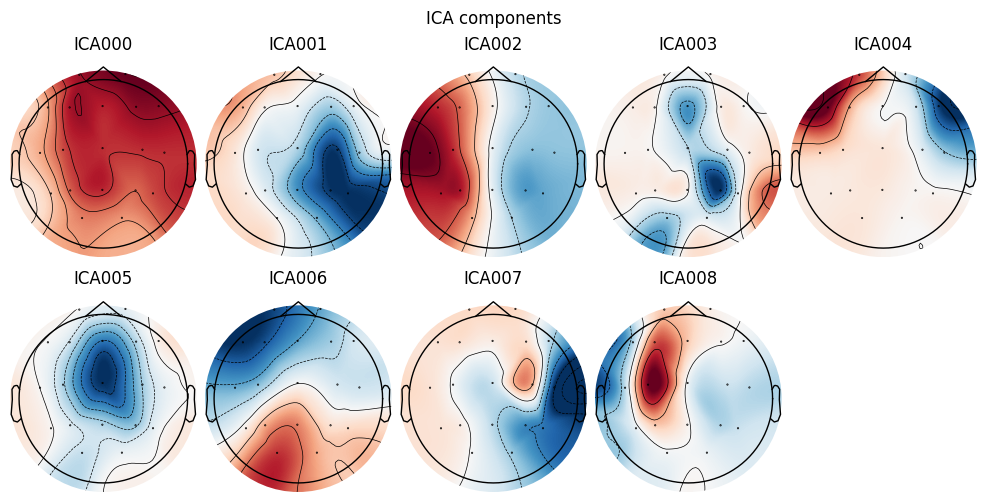

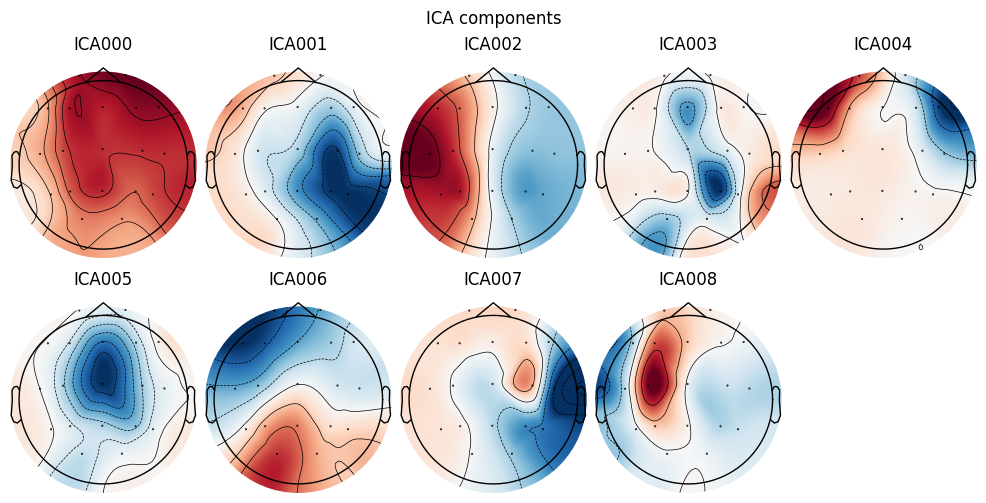

In [22]:
ica.plot_components() # зачем то плотит несколько раз

Creating RawArray with float64 data, n_channels=10, n_times=18000
    Range : 0 ... 17999 =      0.000 ...    89.995 secs
Ready.


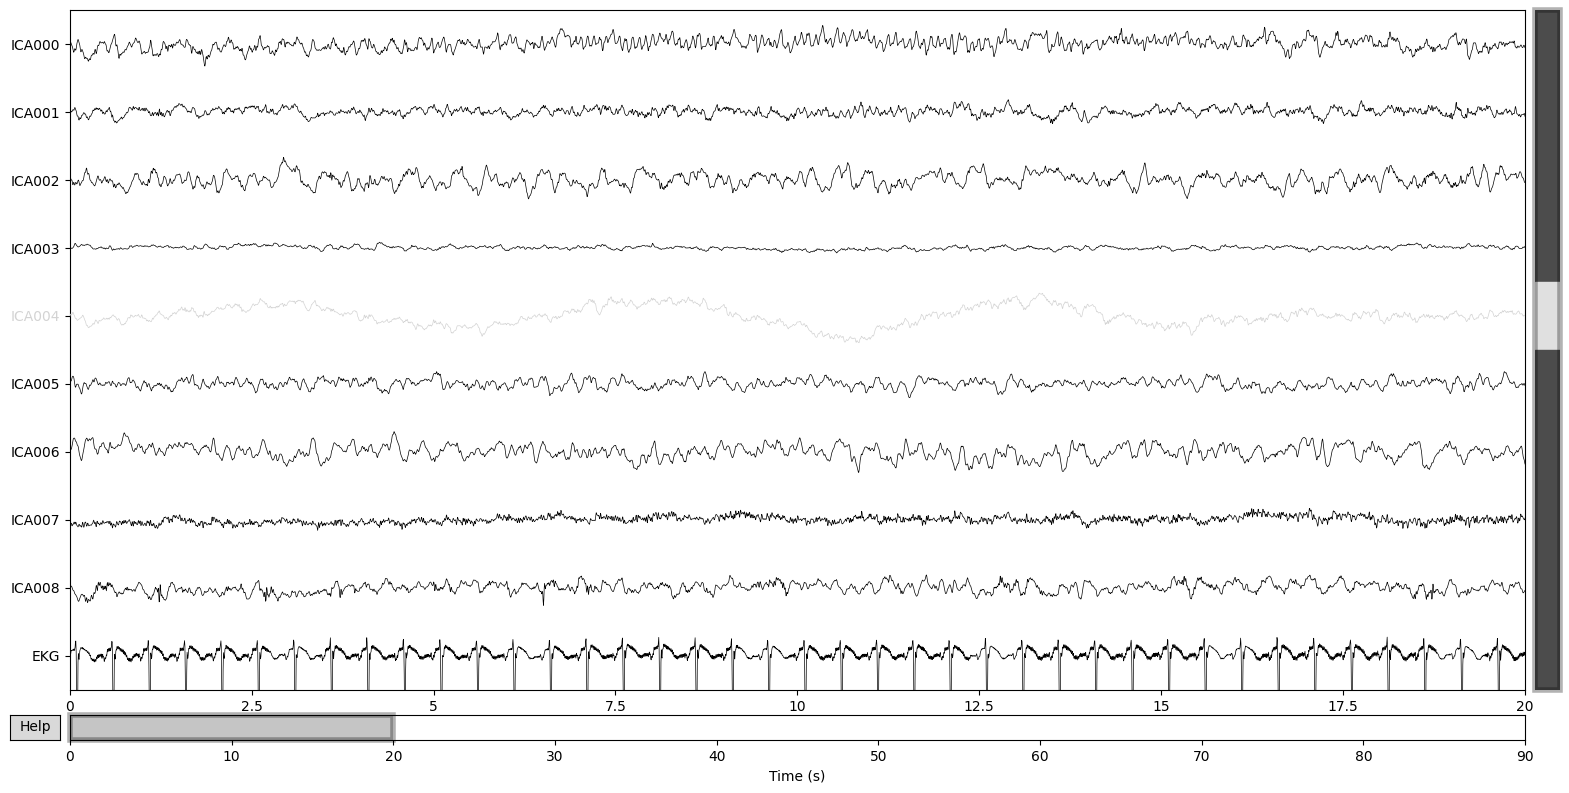

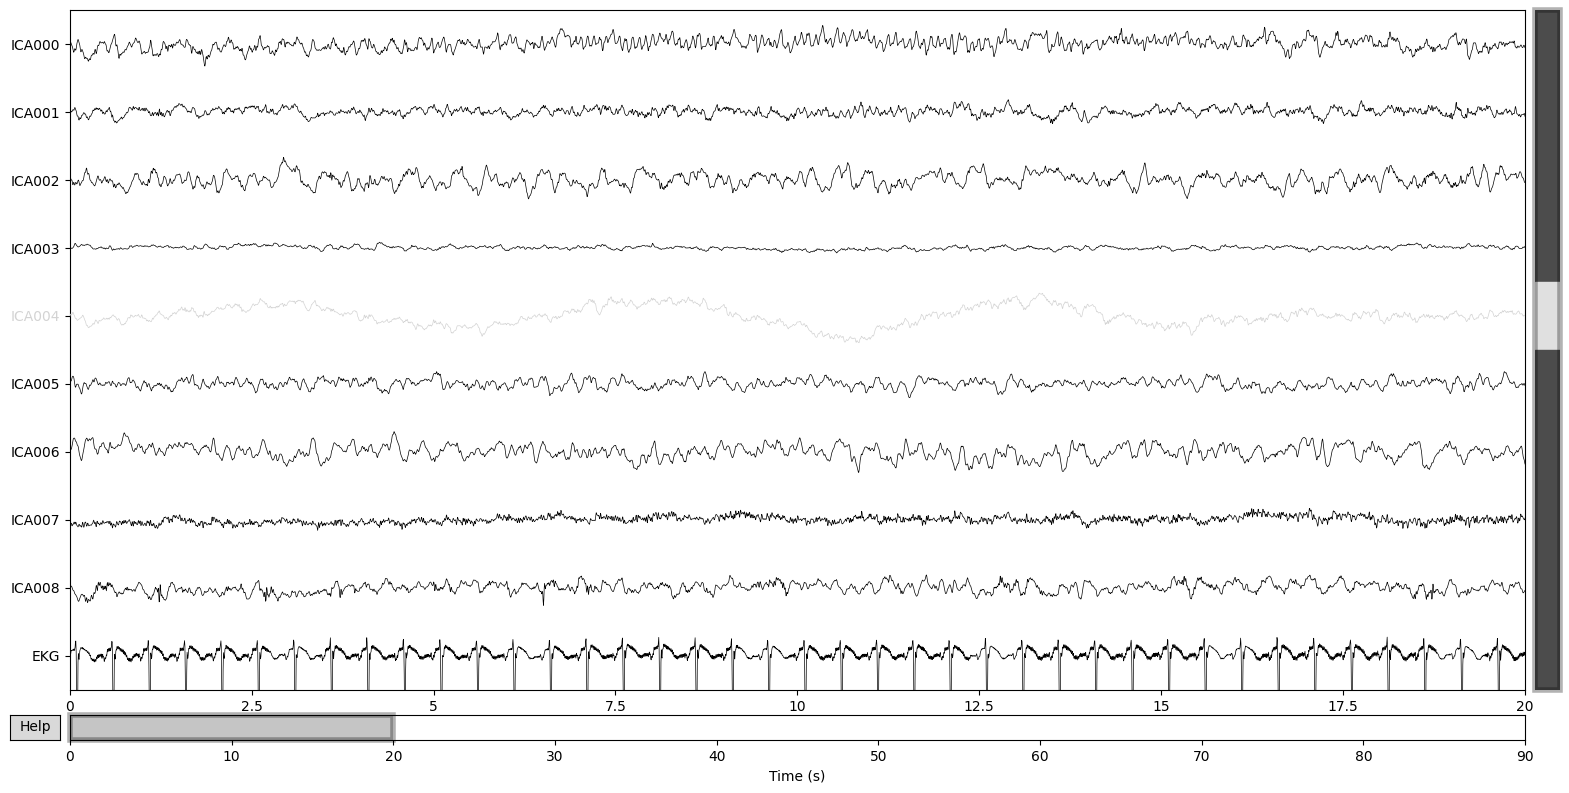

In [27]:
ica.plot_sources(raw) 

Applying ICA to Raw instance
    Transforming to ICA space (9 components)
    Zeroing out 0 ICA components
    Projecting back using 19 PCA components


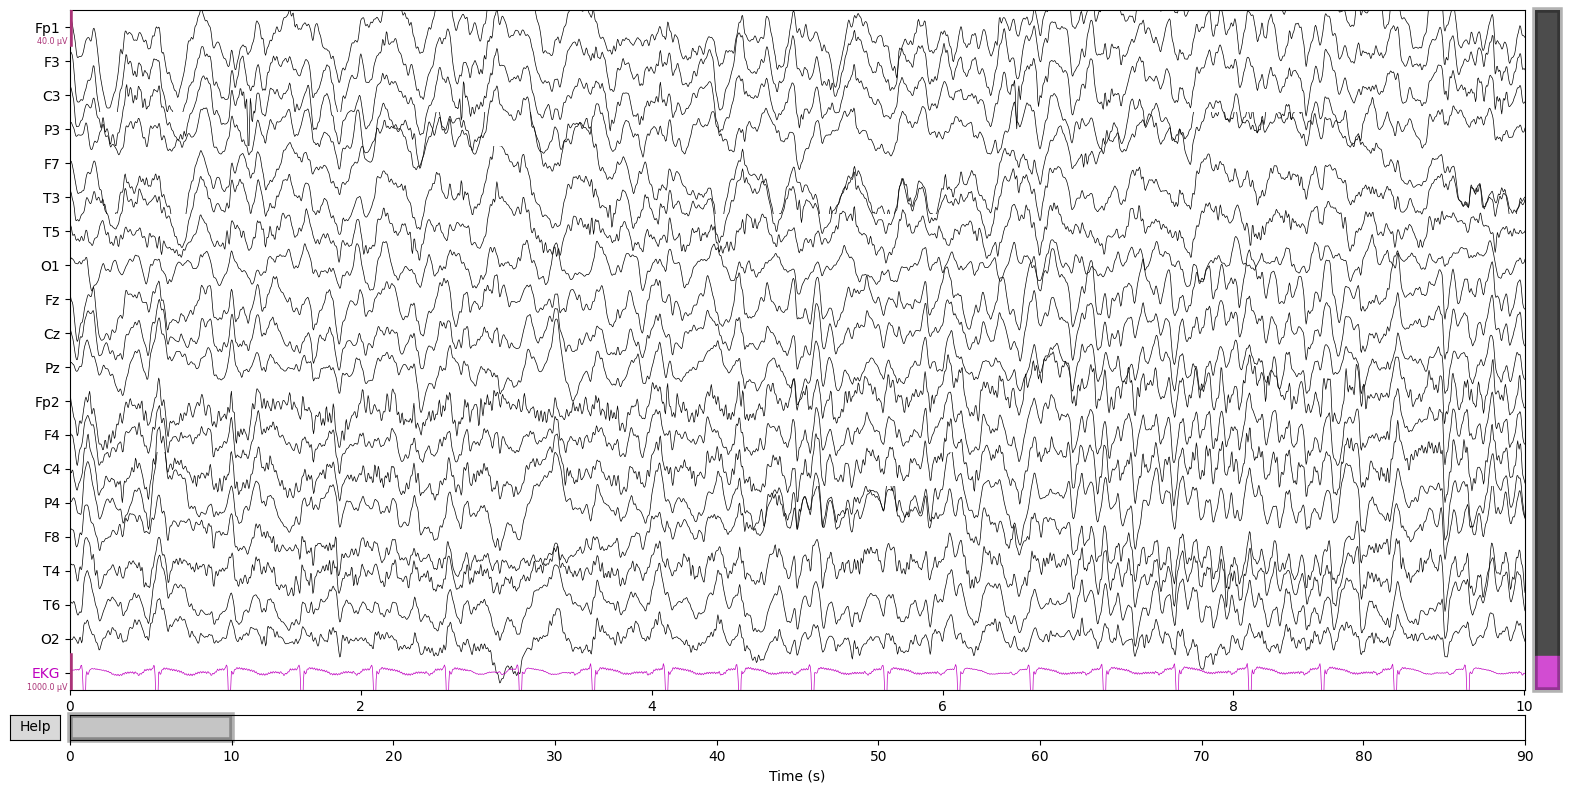

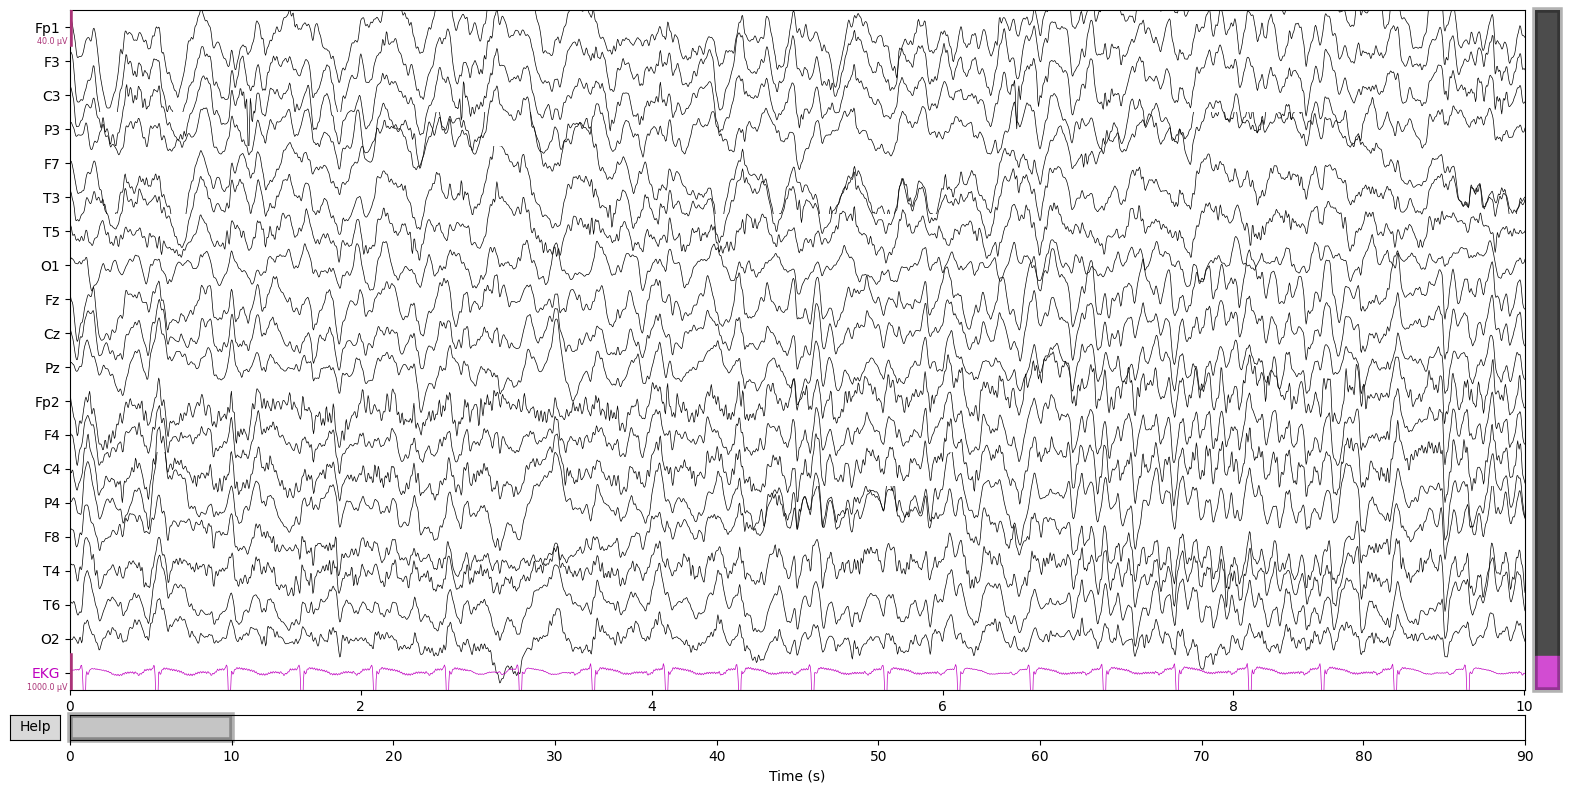

In [28]:
raw_reconstructed = raw.copy()
ica.exclude = [4,'EKG']
ica.apply(raw_reconstructed)
raw_reconstructed.plot()


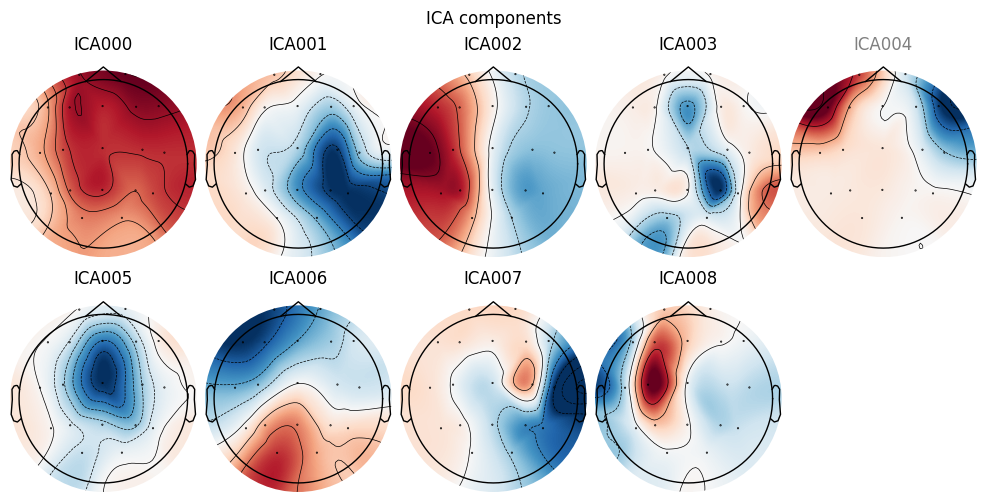

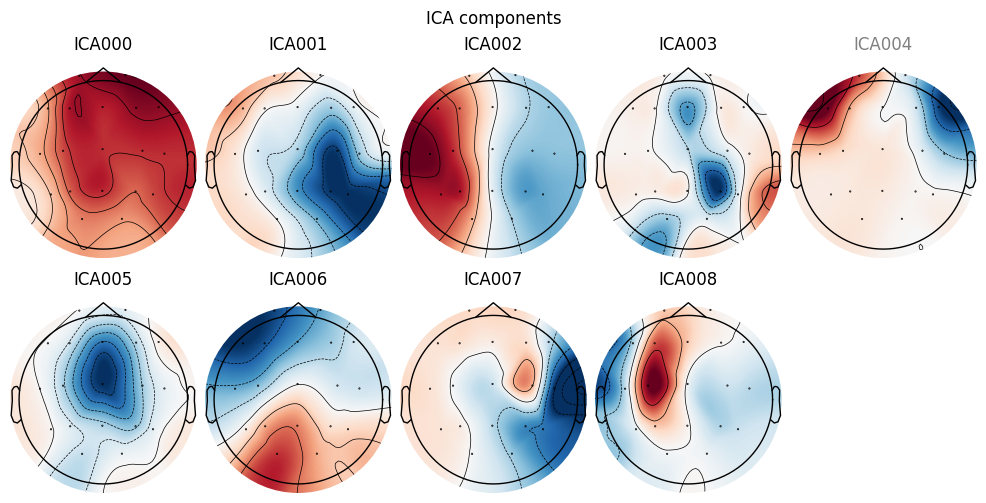

In [29]:
ica.plot_components()

Хоть данный метод и увеличивает качество данных, проблема состоит в том, что мы должны руками перебиреть все файлы. Для нас не особо подходит. :(

EEG channel type selected for re-referencing
Creating RawArray with float64 data, n_channels=18, n_times=18000
    Range : 0 ... 17999 =      0.000 ...    89.995 secs
Ready.
Added the following bipolar channels:
Fp1-F7, F7-T3, T3-T5, T5-O1, Fp2-F8, F8-T4, T4-T6, T6-O2, Fp1-F3, F3-C3, C3-P3, P3-O1, Fp2-F4, F4-C4, C4-P4, P4-O2, Fz-Cz, Cz-Pz


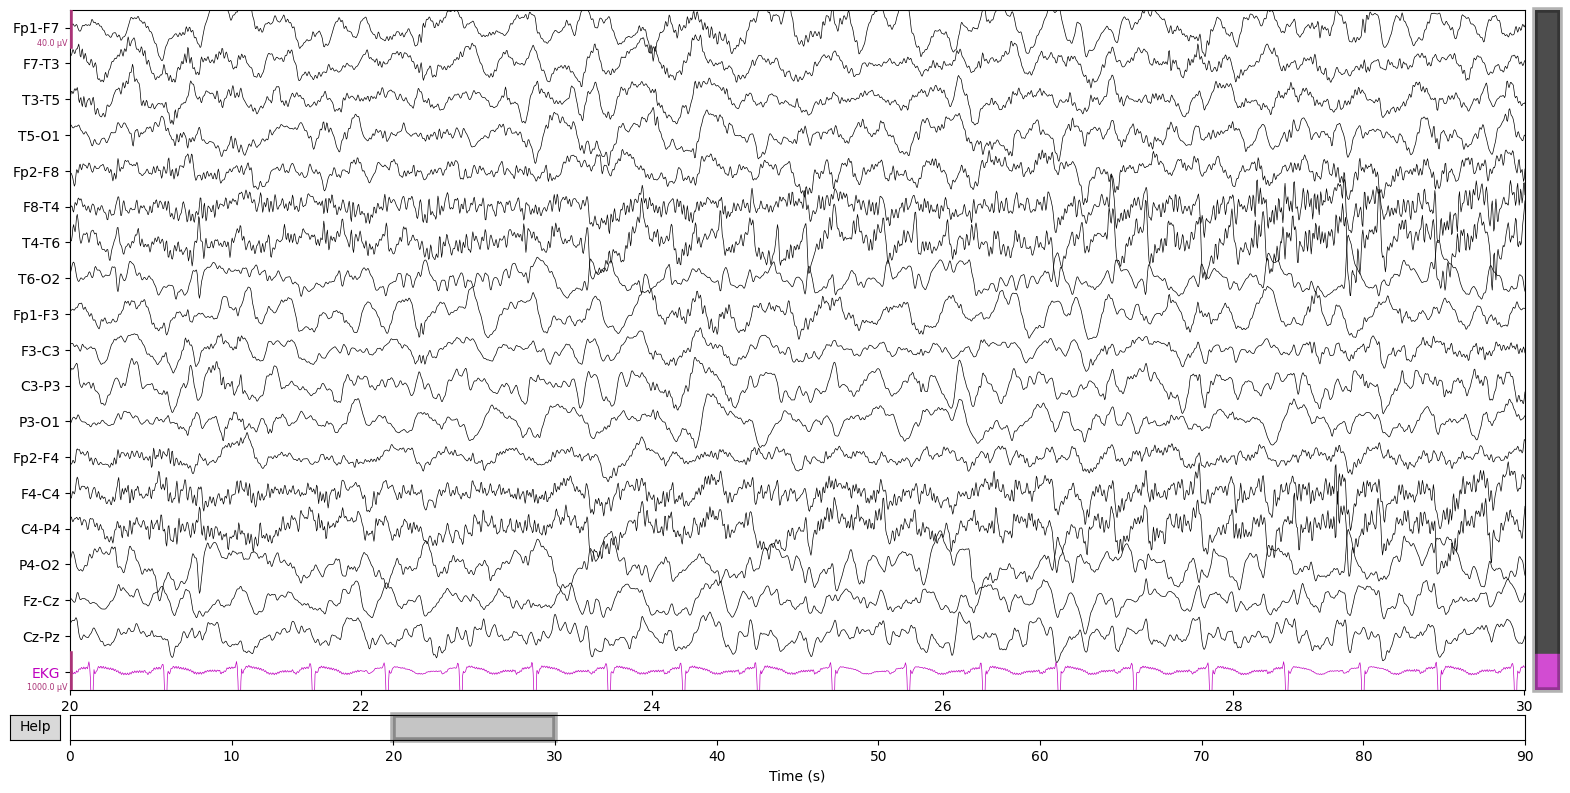

In [30]:
bipolar = [
    ['Fp1', 'F7'], ['F7', 'T3'], ['T3', 'T5'], ['T5', 'O1'],    # Left Temporal
    ['Fp2', 'F8'], ['F8', 'T4'], ['T4', 'T6'], ['T6', 'O2'],    # Right Temporal
    ['Fp1', 'F3'], ['F3', 'C3'], ['C3', 'P3'], ['P3', 'O1'],    # Left Parasagittal
    ['Fp2', 'F4'], ['F4', 'C4'], ['C4', 'P4'], ['P4', 'O2'],    # Right Parasagittal
    ['Fz', 'Cz'], ['Cz', 'Pz'],   # Central
]

anode, cathode = list(map(list,zip(*bipolar)))

raw_bip_ref = mne.set_bipolar_reference(raw_filtered, anode=anode, cathode=cathode)
raw_bip_ref.plot(start=20, duration=10)
plt.show()

In [31]:
raw_bip_ref.time_as_index(1)

array([200])

In [32]:
# взято отсюда https://www.kaggle.com/code/kimbyungchun/preprocess-with-mne-for-human/notebook

mne.set_config('MNE_BROWSE_RAW_SIZE','16,8')

def load_eeg(eeg_id, data_type:Literal['train','test']='train'):
    BASE_PATH = '/kaggle/input/hms-harmful-brain-activity-classification'
    eeg_df = pd.read_parquet(f'{BASE_PATH}/{data_type}_eegs/{eeg_id}.parquet')
    return eeg_df

def get_filtered_bipolar(eeg_id, data_type:Literal['train','test']='train'):
    bipolar = [
        ['Fp1', 'F7'], ['F7', 'T3'], ['T3', 'T5'], ['T5', 'O1'],    # Left Temporal
        ['Fp2', 'F8'], ['F8', 'T4'], ['T4', 'T6'], ['T6', 'O2'],    # Right Temporal
        ['Fp1', 'F3'], ['F3', 'C3'], ['C3', 'P3'], ['P3', 'O1'],    # Left Parasagittal
        ['Fp2', 'F4'], ['F4', 'C4'], ['C4', 'P4'], ['P4', 'O2'],    # Right Parasagittal
        ['Fz', 'Cz'], ['Cz', 'Pz'],   # Central
    ]
    anode, cathode = list(map(list,zip(*bipolar)))

    eeg_df = load_eeg(eeg_id, data_type)
    
    info = mne.create_info(
        eeg_df.columns.to_list(),
        ch_types=(["eeg"]*(len(eeg_df.columns)-1))+['ecg'],
        sfreq=200
    )
    
    info.set_montage("standard_1020")
    
    raw = mne.io.RawArray(
        eeg_df.to_numpy().T*1e-6,    # µV to V
        info
    ).filter(l_freq=1, h_freq=70,).notch_filter(60, picks='eeg')
    
    return mne.set_bipolar_reference(raw, anode=anode, cathode=cathode)

def bipolar(eeg_id, offset=0., duration=10.0, data_type:Literal['train','test']='train', plot=True):
    bip_ref = get_filtered_bipolar(eeg_id, data_type)
    
    start = 25.0 + offset - duration/2
    if plot:
        bip_ref.plot(start=start, duration=duration)
    
    start_idx = bip_ref.time_as_index(start).item()
    stop_idx = bip_ref.time_as_index(start + duration).item()
    return bip_ref.get_data(start=start_idx, stop=stop_idx)

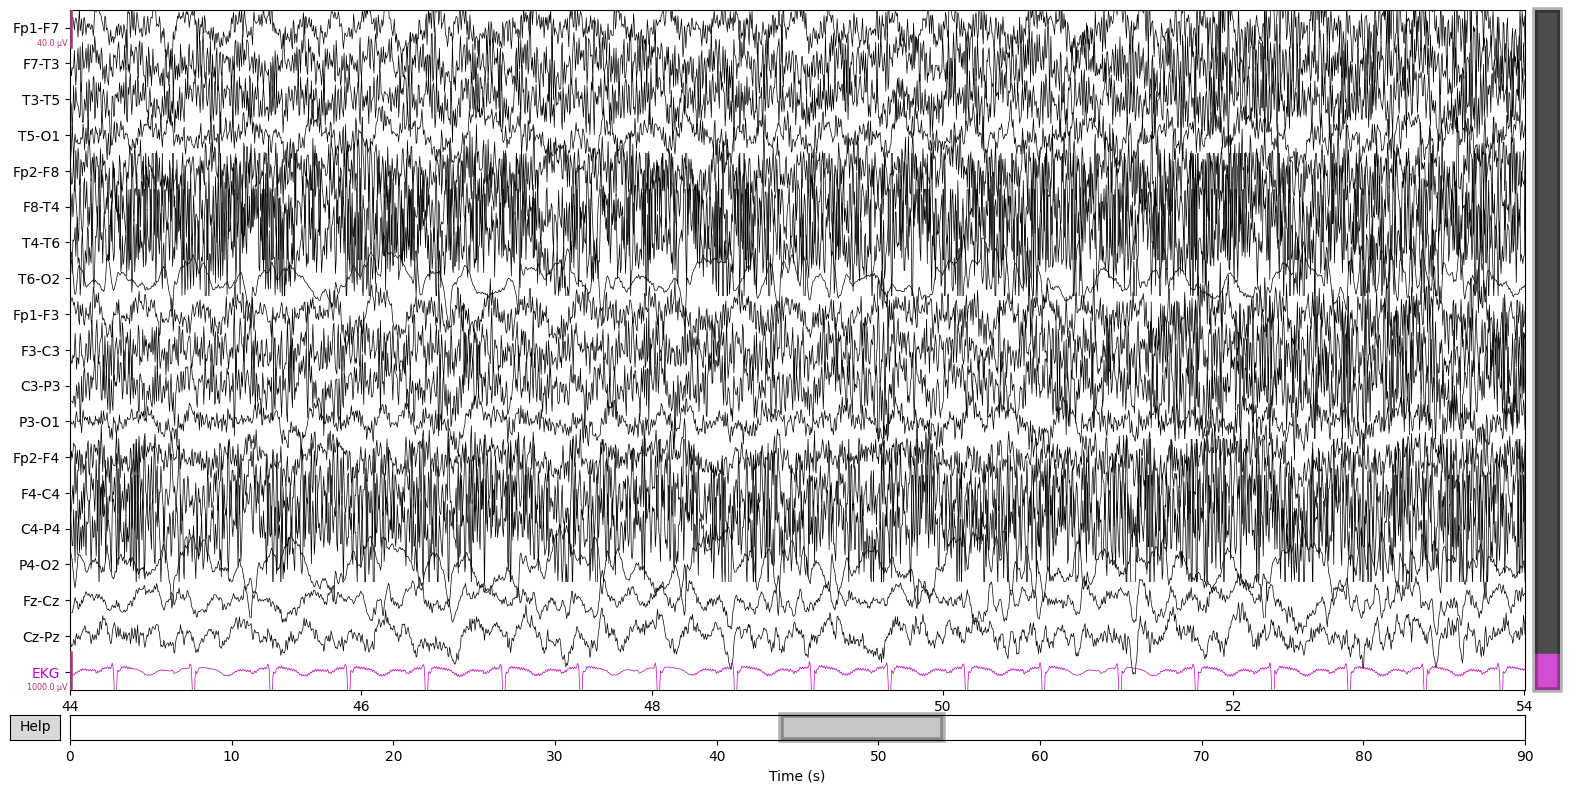

(19, 2000)

In [45]:
data = bipolar(1628180742, 24, 10)
data.shape